In [188]:
# Data Wrangling libs
import numpy as np
import pandas as pd

# Vizualization libs
import matplotlib.pyplot as plt
import seaborn as sns

# Data Encoding libs
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing

# Splitting dataset
from sklearn.model_selection import train_test_split

# Model Training Algorithms
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation libs
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# data processing

In [189]:
# Loading the dataset
data = pd.read_csv("data/ObesityDataSet.csv")
data.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [190]:
data.info()
data.describe()
# Checking weather a dataset contains null values or not and identifying the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


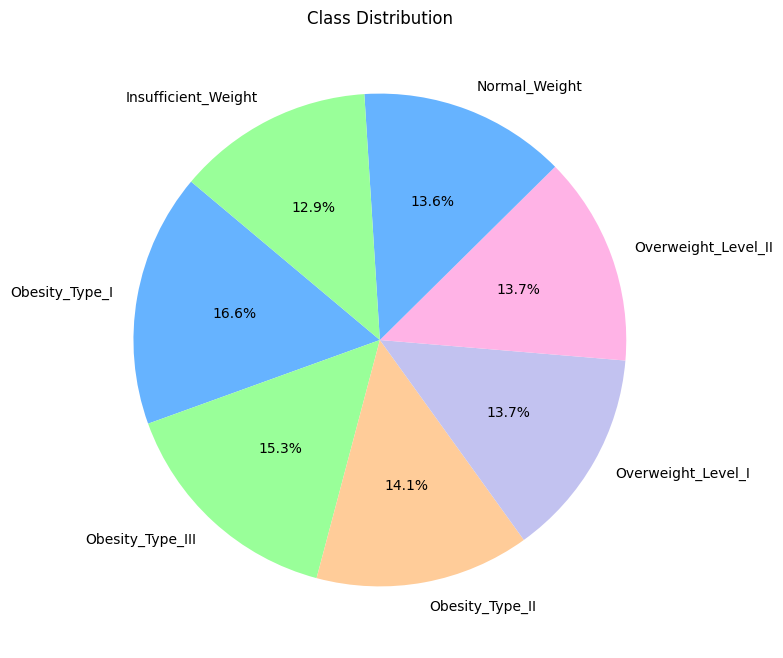

In [191]:
import pandas as pd
import matplotlib.pyplot as plt



# Assuming the column representing classes is named 'class_column'
class_counts = data['NObeyesdad'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99','#ffcc99', '#c2c2f0', '#ffb3e6'])
plt.title('Class Distribution')
plt.show()




In [192]:
data.duplicated()
# find duplicated data

duplicate_rows = data[data.duplicated()]
# make table for duplicated data

duplicate_rows
# display duplicated data


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
98,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
106,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
174,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
179,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
184,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
209,Female,22.0,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
309,Female,16.0,1.66,58.0,no,no,2.0,1.0,Sometimes,no,1.0,no,0.0,1.0,no,Walking,Normal_Weight
460,Female,18.0,1.62,55.0,yes,yes,2.0,3.0,Frequently,no,1.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight
467,Male,22.0,1.74,75.0,yes,yes,3.0,3.0,Frequently,no,1.0,no,1.0,0.0,no,Automobile,Normal_Weight
496,Male,18.0,1.72,53.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight


In [193]:

data = data.drop_duplicates()
# Removing the duplicate rows

data.shape
#shows new shape of data set

(2087, 17)

In [194]:
data.isnull()
#finding null vallues

data.isnull().sum()
# there area 0 null values.

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [195]:
# np.random.seed(8)

# X = data.drop("NObeyesdad",axis=1)
# y = data["NObeyesdad"]

# categorical_features = ["Gender","family_history_with_overweight","FAVC","CAEC","SMOKE","SCC","CALC","MTRANS"]
# one_hot = OneHotEncoder()
# transformer = ColumnTransformer([("one_hot",
#                                    one_hot,
#                                    categorical_features)],
#                                    remainder="passthrough")
# transformed_X = transformer.fit_transform(X)


In [196]:
# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
data['Gender']= label_encoder.fit_transform(data['Gender'])
data['family_history_with_overweight']= label_encoder.fit_transform(data['family_history_with_overweight'])
data['FAVC']= label_encoder.fit_transform(data['FAVC'])
data['CAEC']= label_encoder.fit_transform(data['CAEC'])
data['SMOKE']= label_encoder.fit_transform(data['SMOKE'])
data['SCC']= label_encoder.fit_transform(data['SCC'])
data['CALC']= label_encoder.fit_transform(data['CALC'])
data['MTRANS']= label_encoder.fit_transform(data['MTRANS'])
data['NObeyesdad']= label_encoder.fit_transform(data['NObeyesdad'])

data.head(10)

<ipython-input-196-c407a8d5324f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gender']= label_encoder.fit_transform(data['Gender'])
<ipython-input-196-c407a8d5324f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['family_history_with_overweight']= label_encoder.fit_transform(data['family_history_with_overweight'])
<ipython-input-196-c407a8d5324f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6
5,1,29.0,1.62,53.0,0,1,2.0,3.0,2,0,2.0,0,0.0,0.0,2,0,1
6,0,23.0,1.50,55.0,1,1,3.0,3.0,2,0,2.0,0,1.0,0.0,2,2,1
7,1,22.0,1.64,53.0,0,0,2.0,3.0,2,0,2.0,0,3.0,0.0,2,3,1
8,1,24.0,1.78,64.0,1,1,3.0,3.0,2,0,2.0,0,1.0,1.0,1,3,1
9,1,22.0,1.72,68.0,1,1,2.0,3.0,2,0,2.0,0,1.0,1.0,3,3,1


In [197]:
# X_train, X_test, y_train, y_test = train_test_split(transformed_X,y,test_size=0.2)

In [ ]:
# plt.plot(['Age'], ['NObeyesdad'] , marker = 'o', linestyle = '-', label= 'Age and obesity')
# plt.xlabel('Age')
# plt.ylabel('Obesity level')

# plt.legend()
# plt.show()

from pandas.plotting import scatter_matrix

scatter_matrix(data, alpha=0.2, figsize=(16, 12), diagonal='kde');

In [ ]:
data.plot(kind='scatter', x='Age', y="NObeyesdad", title='Sepal length vs width' ,figsize=(8,8));

In [ ]:
fig = plt.figure();
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

# group the data instances according to the different classes they belong to
groups = data.groupby('NObeyesdad')

# iterate over each group and plot (scatter)
for name, group in groups:
    ax.plot(group.Age, group.NObeyesdad, marker='x', linestyle='', ms=12, label=name)

# set labels for the y and x axes
ax.set_xlabel('Age')
ax.set_ylabel('Obesity level')

# add legend to the figure
ax.legend()

In [ ]:
fig = plt.figure();
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

# group the data instances according to the different classes they belong to
groups = data.groupby('NObeyesdad')

# iterate over each group and plot (scatter)
for name, group in groups:
    ax.plot(group.Age, group.NCP, marker='x', linestyle='', ms=12, label=name)

# set labels for the y and x axes
ax.set_xlabel('Age')
ax.set_ylabel('Obesity level')

# add legend to the figure
ax.legend()

In [ ]:
# Compute pairwise correlation of all features

# Using Pearson's (linear relationship) - assumes normal distribution
# corr = data.corr(method='pearson')
# print (corr)

# Using Sparman's (non-linear relationship) - doesn't assume normal distribution
corr = data.corr(method='spearman')
print ("\n",corr)
# Correlation matrix - Seaborn heatmap
sns.heatmap(data=corr, annot=True, linewidths=.5, fmt= '.1f')